# Exercise 1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib). These libraries can be installed using the ```pip``` command line tool. Alternatively you can install an python distribution like [Anaconda](https://www.continuum.io/downloads) or [Canopy](https://www.enthought.com/products/canopy/)  which have these and many other standard package pre-installed.

In [1]:
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
import numpy as np # linear algebra / matrices
from matplotlib.patches import Rectangle
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
class idict(dict):
    def __init__(self,*args,**kwargs) : dict.__init__(self,*args,**kwargs) 
    def __str__(self): return 'ImageDictionary'
    def __repr__(self): return 'ImageDictionary'

## Load Images
Make sure you extract the ```matlab.zip``` file to the same directory as this notebook so there is a ```data/``` directory (or fix the paths after the ```imread``` command

In [2]:
a=imread('data/scroll.tif')
b=imread('data/wood.tif')
c=imread('data/asphalt_gray.tif')

## Showing images

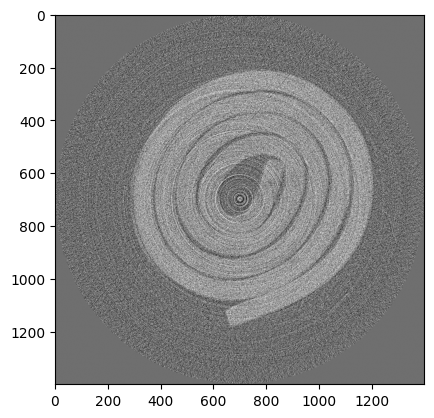

In [3]:
%matplotlib inline
# setup the plotting environment
plt.imshow(a, cmap = 'gray'); # show a single image

### Subplots
Here we show multiple subplots within a single figure

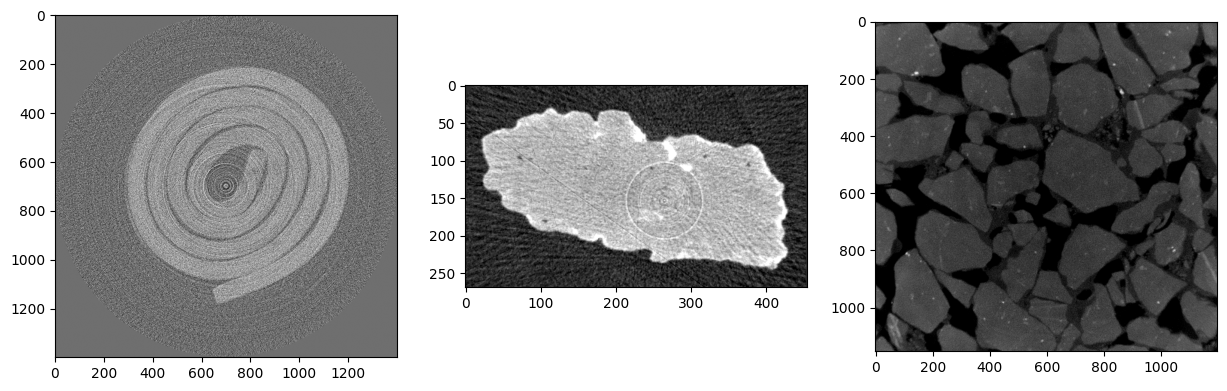

In [4]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(a, cmap = 'gray')
ax2.imshow(b, cmap = 'gray')
ax3.imshow(c, cmap = 'gray')

## Compute SNR
We can compute the SNR by looking at the ratio of the mean to the standard deviation in a region that is supposed to be constant

$$ SNR = \frac{\mu_{img}}{\sigma_{img}} $$

SNR for A_1 is 2.520218313693774


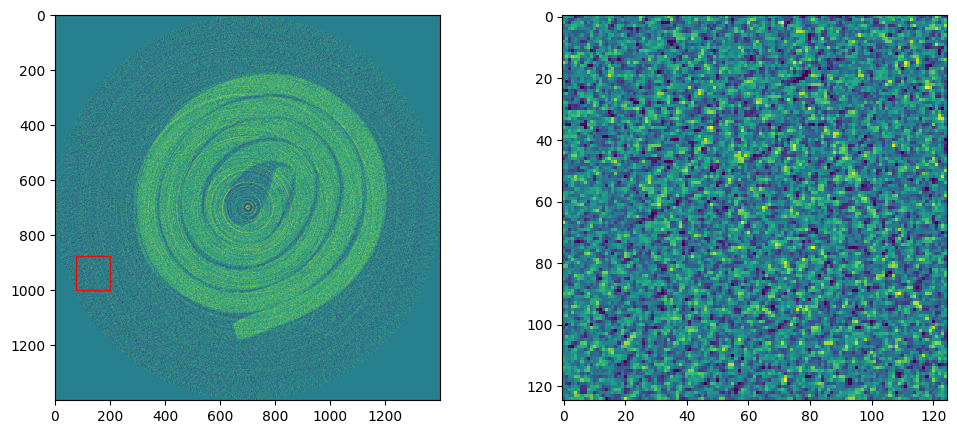

In [5]:
# Identify the region
x1 = 75
x2 = 200
y1 = 875
y2 = 1000

fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(a)
ax[0].add_patch( Rectangle((x1, y1),
                        x2-x1, y2-y1,
                        fc ='none', 
                        ec ='r',
                        lw = 1) )
# extract a sub image
subA1=a[y1:y2,x1:x2];
snrA1=np.mean(subA1)/np.std(subA1) # compute the snr
print("SNR for A_1 is {}".format(snrA1))
ax[1].imshow(subA1);

# Exercise 2
Test filter performance for different SNR and filter types. We will here focus on the uniform convolution filter kernel and the median filter.

The first step is to create a set of noisy images based on the clean image ```data/testpattern.png```. 

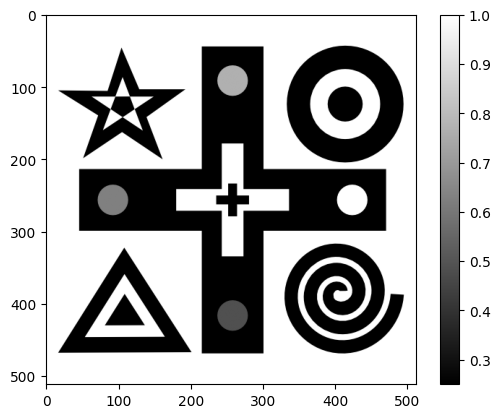

In [34]:
original_img=np.mean(imread('data/testpattern.png'),2)/255.
plt.imshow(original_img, cmap= 'gray');
plt.colorbar()

Next step is to create a dictionary of noisy images with different SNR, e.g. SNR=1,2,5,10,20,100. Use additive white Gaussian noise.
The random number generator is imported from numpy ```import numpy.random.normal as normal```.

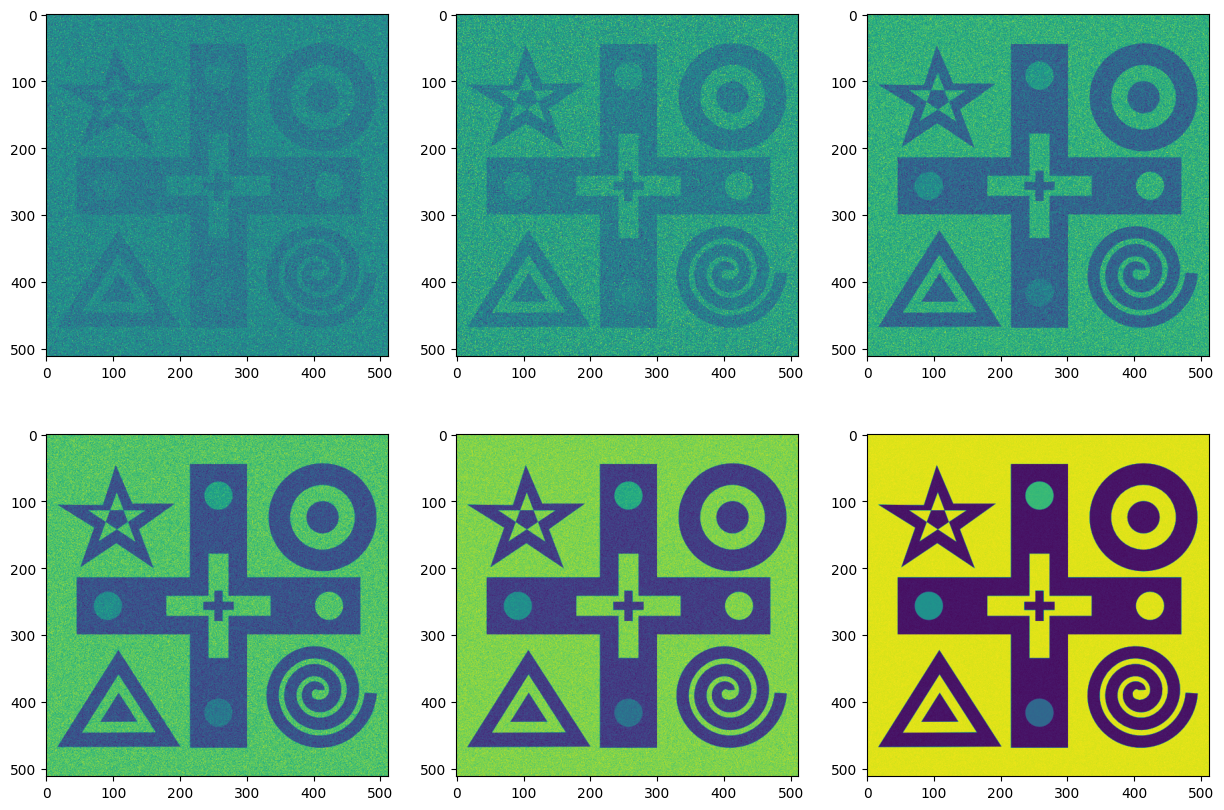

In [35]:
SNRs = [1.0,2.0,5.0,10.0,20.0,100.0]
noisy_images = {}

for SNR in SNRs :
    noisy_images[SNR]=original_img/original_img.max() + 1.0/SNR*np.random.normal(0,1,size=original_img.shape) 
    
fig, axes = plt.subplots(2,3,figsize = (15,10))
axes=axes.ravel()
    
for  ((snr,img),ax) in zip(noisy_images.items(),axes) :
    ax.imshow(img)


# Filter the images
You can read about the standard filters in scipy by looking at the documentation in http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.filters alternatively more (different) filters are available using scikit image or OpenCV for the more advanced students

## Uniform Filters
Check the uniform filter documentation for reference:
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.uniform_filter.html#scipy.ndimage.filters.uniform_filter

In this example we explore how the filter width of a uniform filter affects the image quality of the noisy test images we created earlier. Pay attention to how the SNR improves with the filter size and what the effect is on the edges in the image. 

The code below is mainly about showing the results. The important lines are commented.

In [36]:
def mse(img1,img2):
    return np.mean((img1-img2)**2)

/tmp/ipykernel_36372/3765206087.py:1: DeprecationWarning: Please import `uniform_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import uniform_filter


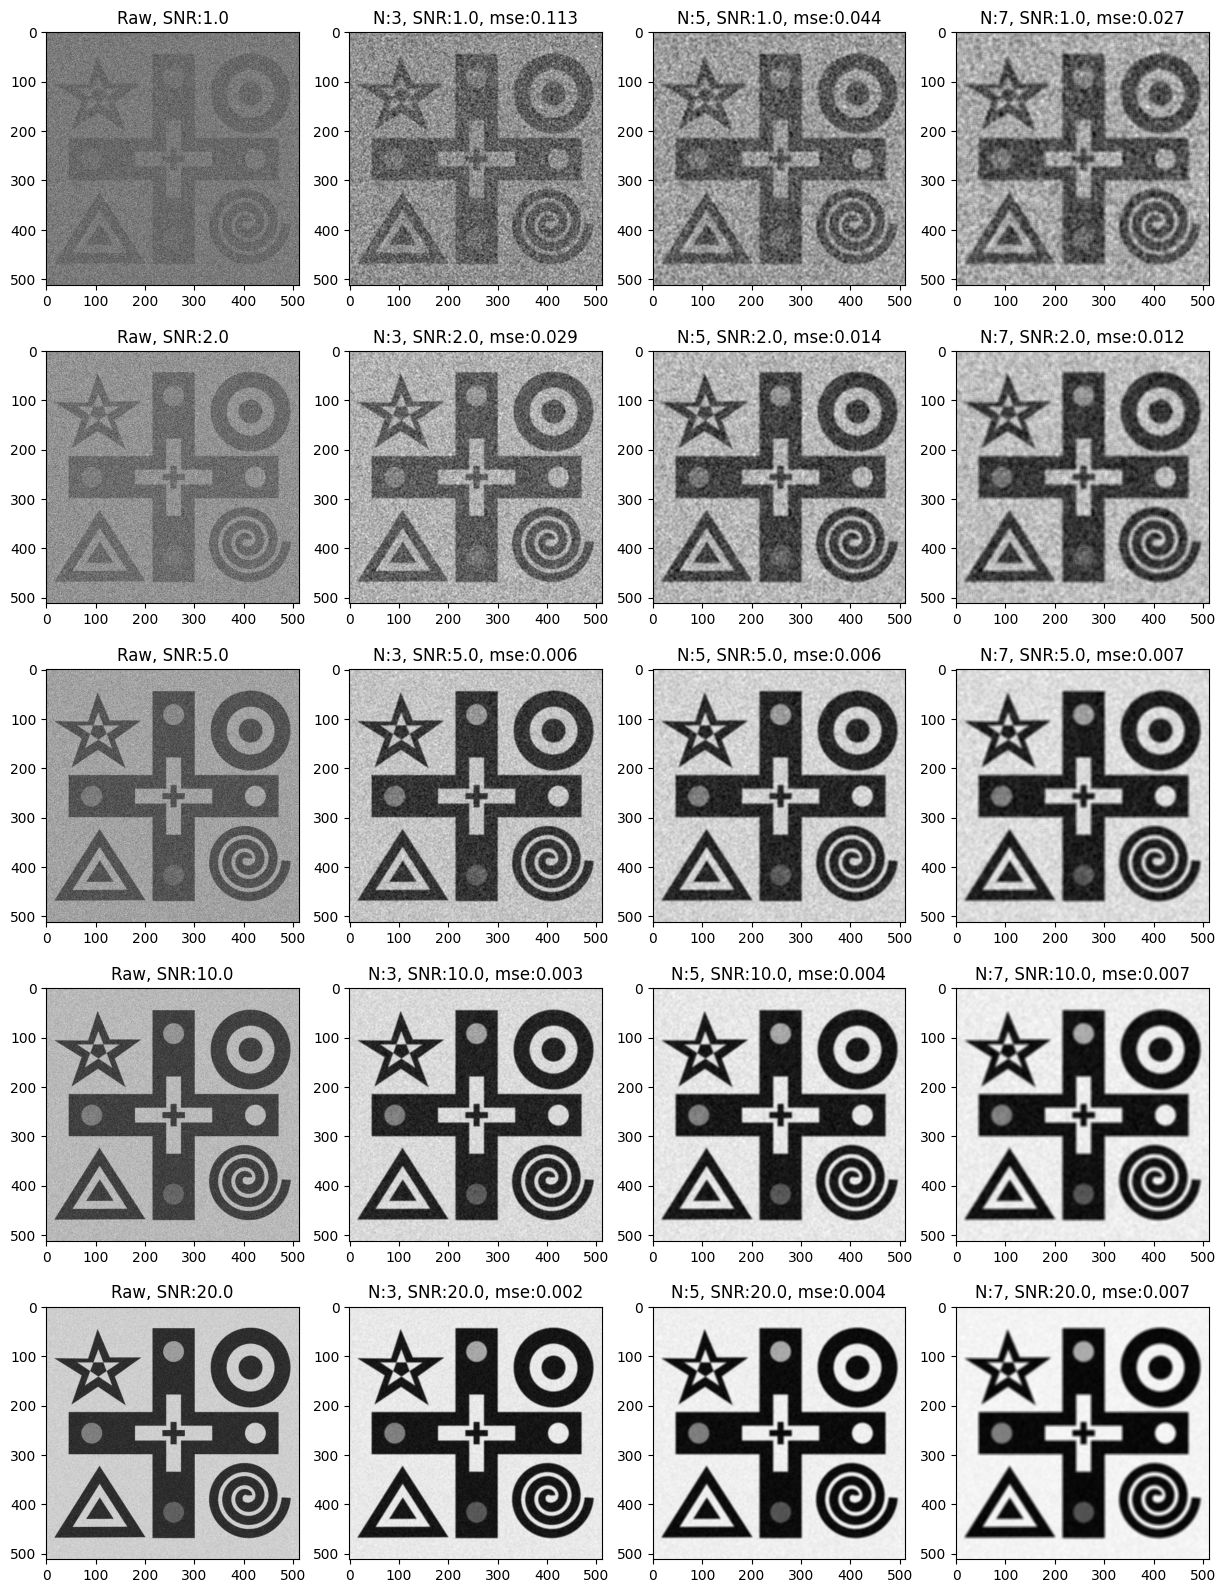

In [37]:
from scipy.ndimage.filters import uniform_filter

# Size of the filter windows. You can select different filter sizes if you like. 
# Always use odd numbers for the filter size unless you have a good reason. 
N=[3,5,7];

fig, all_axes = plt.subplots(5, 1+len(N), figsize=(15,20))
for ((snr,img),ax) in zip(noisy_images.items(),all_axes) :
    ax[0].imshow(img,cmap='gray')
    ax[0].set_title("Raw, SNR:{}".format(snr))
    for idx,filter_size in enumerate(N):       
        
        filtered = uniform_filter(img,filter_size) # Here the actual filtering takes place

        error = mse(original_img,filtered)
        
        ax[1+idx].imshow(filtered, cmap='gray')
        ax[1+idx].set_title(f"N:{filter_size}, SNR:{snr}, mse:{error:.3f}")